In [3]:
import numpy as np 
from glob import glob
import pandas as pd 
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.image as mpimg
from keras import regularizers
import cv2

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

In [7]:
df = pd.read_csv(r"C:\Users\vtraj\Desktop\Distracted-Driver-Detection-Deep-Learning\driver_imgs_list.csv")
df.head(5)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [11]:
train_images=[]
train_labels=[]
    
#Loop over the training folder
for class_num in tqdm(range(10)):
    print('Loading directory c{}'.format(class_num))
    files = glob(os.path.join(r'C:\Users\vtraj\Desktop\Distracted-Driver-Detection-Deep-Learning\imgs\train\c' + str(class_num), '*.jpg'))
    for file in files:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        train_images.append(img)
        train_labels.append(class_num)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Loading directory c0


 10%|████████▎                                                                          | 1/10 [00:36<05:25, 36.20s/it]

Loading directory c1


 20%|████████████████▌                                                                  | 2/10 [01:09<04:34, 34.29s/it]

Loading directory c2


 30%|████████████████████████▉                                                          | 3/10 [01:40<03:49, 32.84s/it]

Loading directory c3


 40%|█████████████████████████████████▏                                                 | 4/10 [02:11<03:14, 32.37s/it]

Loading directory c4


 50%|█████████████████████████████████████████▌                                         | 5/10 [02:43<02:39, 31.93s/it]

Loading directory c5


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [03:14<02:06, 31.68s/it]

Loading directory c6


 70%|██████████████████████████████████████████████████████████                         | 7/10 [03:44<01:33, 31.11s/it]

Loading directory c7


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [04:10<00:59, 29.54s/it]

Loading directory c8


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [04:35<00:28, 28.03s/it]

Loading directory c9


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [05:03<00:00, 30.31s/it]


In [13]:
print(len(train_images))
print(len(train_labels))

22424
22424


In [17]:
y = to_categorical(train_labels, 10)
X_train, X_test, y_train, y_test = train_test_split(train_images, y, test_size=0.3, random_state=42)
print(len(X_train))
print(len(X_test))
print(X_train[0].shape)

15696
6728
(64, 64)


In [19]:
X_train = np.array(X_train, dtype=np.uint8).reshape(-1,64,64,1)
X_test = np.array(X_test, dtype=np.uint8).reshape(-1,64,64,1)
print(X_train.shape)
print(X_test.shape)

(15696, 64, 64, 1)
(6728, 64, 64, 1)


In [21]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(15696, 64, 64, 1)
(3364, 64, 64, 1)
(3364, 64, 64, 1)


In [23]:
rows, cols = 64, 64

In [25]:
model = Sequential()
    
#CNN1
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', 
              padding = "SAME", input_shape = (rows, cols, 1),
              kernel_regularizer=regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(128, kernel_size = 3, activation = 'relu', 
              padding = "SAME", input_shape = (rows, cols, 1),
              kernel_regularizer=regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))

#CNN2
model.add(Conv2D(256, kernel_size = 3, activation = 'relu', 
              padding = "SAME", input_shape = (rows, cols, 1),
              kernel_regularizer=regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(256, kernel_size = 3, activation = 'relu', 
              padding = "SAME", input_shape = (rows, cols, 1),
              kernel_regularizer=regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))


#Output
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

C:\Users\vtraj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
#Details about the model
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,126,922 (11.93 MB)

 Trainable params: 3,125,642 (11.92 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                   epochs=10, batch_size=64, verbose=1)

print('History of the training',history.history)

Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.2184 - loss: 5.0430 - val_accuracy: 0.1091 - val_loss: 5.0707
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.6523 - loss: 1.3015 - val_accuracy: 0.2753 - val_loss: 2.6536
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.8761 - loss: 0.7123 - val_accuracy: 0.7747 - val_loss: 1.0316
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 242s 982ms/step - accuracy: 0.9173 - loss: 0.5923 - val_accuracy: 0.7194 - val_loss: 1.1197
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 241s 980ms/step - accuracy: 0.9346 - loss: 0.5360 - val_accuracy: 0.9727 - val_loss: 0.4001
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 263s 982ms/step - accuracy: 0.9435 - loss: 0.4929 - val_accuracy: 0.8145 - val_loss: 0.9303
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.9468 - loss: 0.4649 - val_accuracy: 0.7961 - val_loss: 0.8987
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.9496 - loss: 0.4365 -

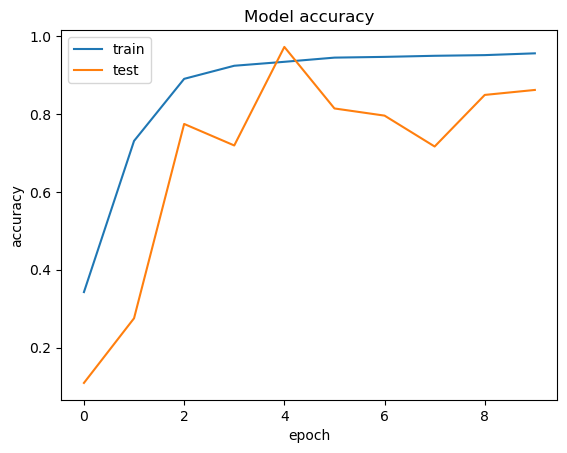

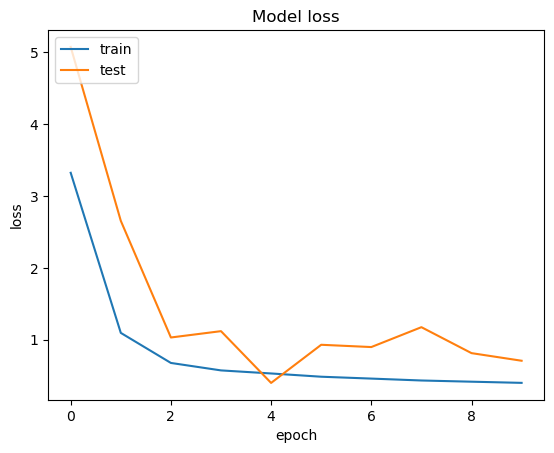

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
test_history = model.evaluate(X_test, y_test, verbose=1)
model.save('driver_model.keras')

106/106 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - accuracy: 0.8600 - loss: 0.6823


In [39]:
print('Loss: ', test_history[0])
print('Accuracy: ', test_history[1]*100, ' %')

Loss:  0.6667251586914062
Accuracy:  87.00951337814331  %


In [41]:
action_dict = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Y prediction: [[6.2763792e-01 1.2352625e-04 1.3154049e-02 5.0330686e-04 3.2300824e-01
  1.9135341e-02 3.6001895e-04 4.4795494e-03 1.0299402e-02 1.2986875e-03]]
Predicted: Safe driving


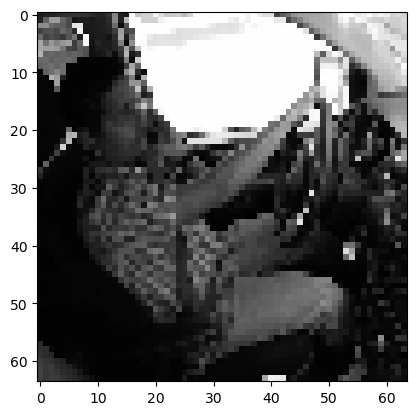

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Y prediction: [[3.2962704e-05 3.2156481e-06 9.9994695e-01 1.3344211e-07 1.2106183e-07
  8.3332598e-06 3.3318020e-06 2.9063435e-06 1.2466396e-06 8.4555938e-07]]
Predicted: Talking on the phone - right


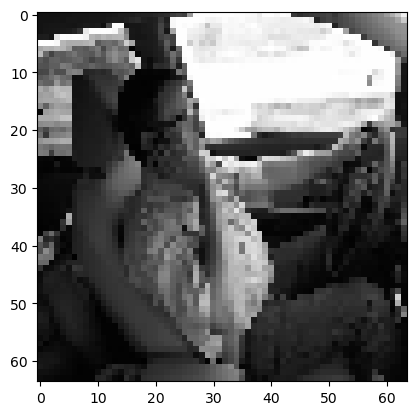

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Y prediction: [[9.2602742e-05 2.2219381e-05 2.4477858e-04 1.1113987e-05 3.7725584e-04
  7.6694843e-05 3.0404504e-04 9.6753665e-04 9.9607521e-01 1.8285392e-03]]
Predicted: Hair and makeup


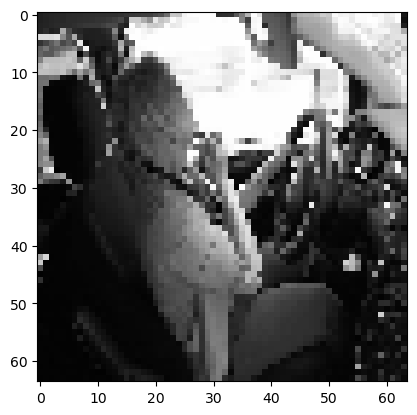

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Y prediction: [[1.1412826e-03 1.7377415e-06 3.4302275e-06 9.9296379e-01 1.4702389e-05
  5.8558527e-03 8.0291642e-07 7.7355799e-06 6.6430844e-06 4.0535151e-06]]
Predicted: Texting - left


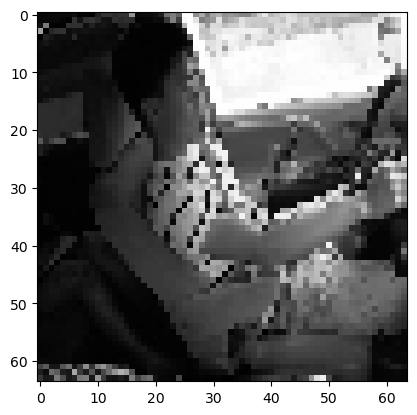

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Y prediction: [[9.0765045e-10 3.6089569e-11 9.2441782e-10 3.7763987e-09 1.9275510e-11
  1.0000000e+00 1.7350557e-10 2.9742483e-10 5.8235257e-11 3.0324774e-09]]
Predicted: Operating the radio


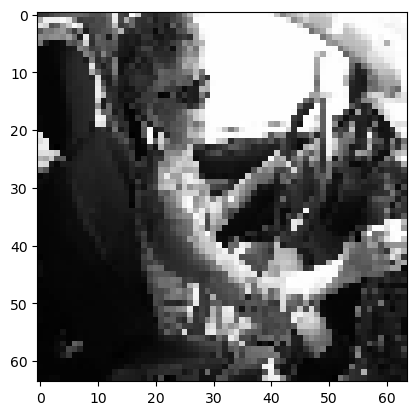

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Y prediction: [[3.8599390e-10 6.5569701e-13 1.0714306e-11 3.6490685e-11 2.4114429e-13
  1.0000000e+00 7.3475106e-12 5.8411574e-11 1.7780307e-11 1.1420785e-09]]
Predicted: Operating the radio


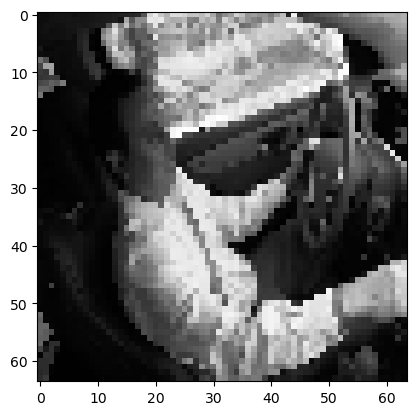

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Y prediction: [[4.5068234e-01 4.1313738e-01 4.2174250e-02 2.6638468e-04 1.3594244e-03
  2.6367346e-02 1.3529886e-02 4.1583744e-03 2.2238009e-02 2.6086552e-02]]
Predicted: Safe driving


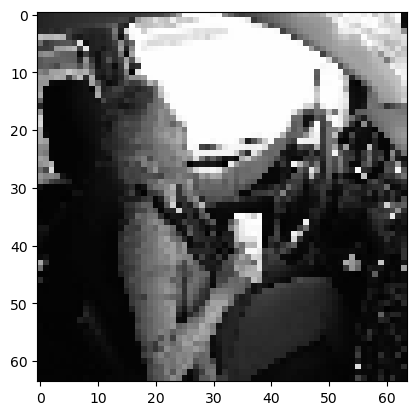

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Y prediction: [[4.3211910e-03 2.0210504e-05 9.7789359e-04 4.9127962e-06 1.2122537e-03
  1.1889942e-04 2.7412274e-05 7.9158286e-04 9.8952454e-01 3.0011409e-03]]
Predicted: Hair and makeup


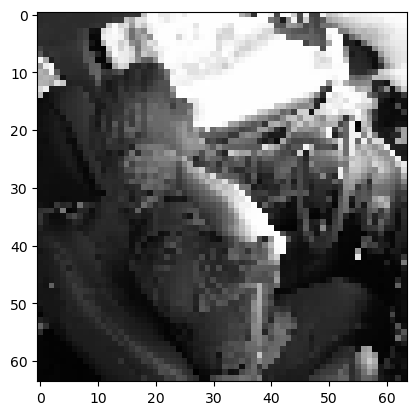

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Y prediction: [[2.3965985e-01 1.0529934e-04 2.4275258e-03 1.1508900e-03 6.3047999e-01
  4.3085657e-02 3.2145519e-05 6.2489856e-02 2.1507207e-03 1.8418087e-02]]
Predicted: Talking on the phone - left


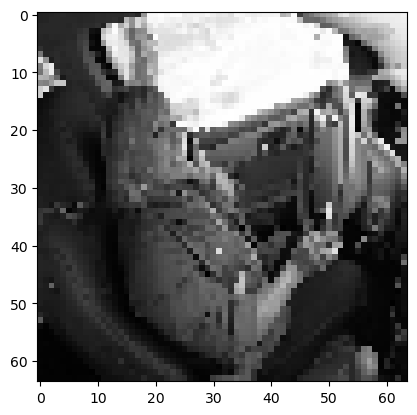

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Y prediction: [[1.2270710e-11 1.8798515e-12 1.7605989e-09 2.8682937e-10 6.9603190e-12
  1.0000000e+00 4.8527064e-11 4.0338077e-11 2.8885715e-12 5.4631859e-12]]
Predicted: Operating the radio


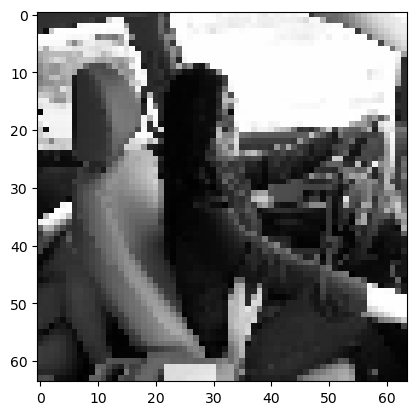

In [119]:
np.random.seed(42)
samples = np.random.choice(3364, 10, replace=False)
for i in samples:
    img = X_test[i]
    plt.imshow(img, cmap='gray')
    
    img = img.reshape(-1,64,64,1)
    y_prediction = model.predict(img, verbose=1)
    print('Y prediction: {}'.format(y_prediction))
    print('Predicted: {}'.format(action_dict.get('c{}'.format(np.argmax(y_prediction)))))
    
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Y prediction: [[3.7510058e-01 1.7319036e-06 8.5806396e-06 6.2384224e-01 9.7872007e-06
  6.0348923e-04 2.4803913e-07 5.2178889e-06 1.0534477e-05 4.1761159e-04]]
Predicted: Texting - left


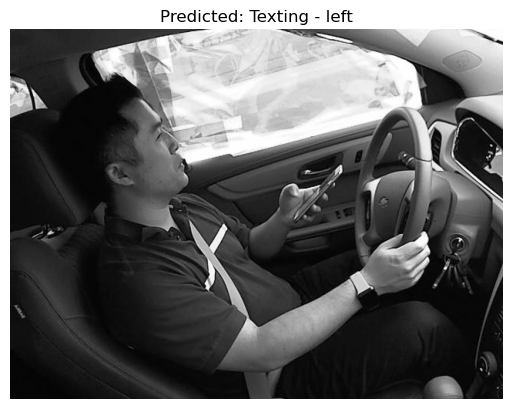

In [125]:
def preprocess_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to 64x64 pixels
    img = cv2.resize(img, (64, 64))

    # Reshape the image to match the input shape of the model
    img = img.reshape(-1, 64, 64, 1)  # Shape: (1, 64, 64, 1)
    
    return img

model = load_model('driver_model.keras')
image_path = r"C:\Users\vtraj\Desktop\Distracted-Driver-Detection-Deep-Learning\imgs\train\c3\img_537.jpg" # Specify your image path
preprocessed_image = preprocess_image(image_path)

y_prediction = model.predict(preprocessed_image, verbose=1)
print('Y prediction: {}'.format(y_prediction))
print('Predicted: {}'.format(action_dict.get('c{}'.format(np.argmax(y_prediction)))))
predicted_class = action_dict.get('c{}'.format(np.argmax(y_prediction))) 
img_display = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_display, cmap='gray')
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')  # Hide axes
plt.show()
